In [1]:
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters,max_iter):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

In [5]:
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
 df= pd.read_csv('matrix3.csv')

In [7]:
df.head()

,X,Y
0,52.78,13.48
1,40.40,21.10
2,58.89,22.16
3,37.82,14.91
4,30.27,10.29


In [8]:
df.tail()

,X,Y
1995,36.62,33.43
1996,42.51,34.01
1997,29.54,30.93
1998,69.38,40.31
1999,67.89,37.92


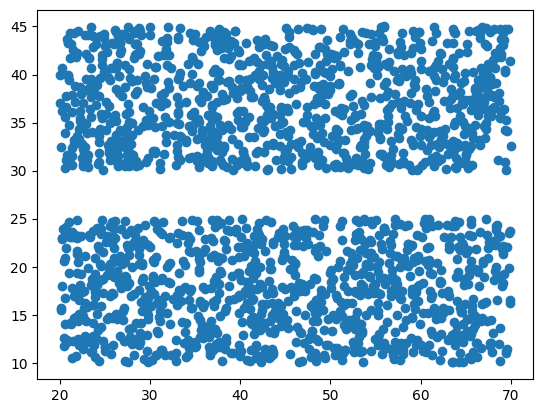

In [9]:
  plt.scatter(df['X'],df['Y'])

In [10]:
X=df.iloc[:, [0,1]].values

In [11]:
km=KMeans(n_clusters=2,max_iter=100)

In [12]:
y_predicted = km.fit_predict(X)


In [13]:
df['cluster']=y_predicted
df.head()

,X,Y,cluster
0,52.78,13.48,0
1,40.40,21.10,0
2,58.89,22.16,0
3,37.82,14.91,0
4,30.27,10.29,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
 6   cluster        150 non-null    int32  
dtypes: float64(4), int32(1), int64(2)
memory usage: 7.7 KB


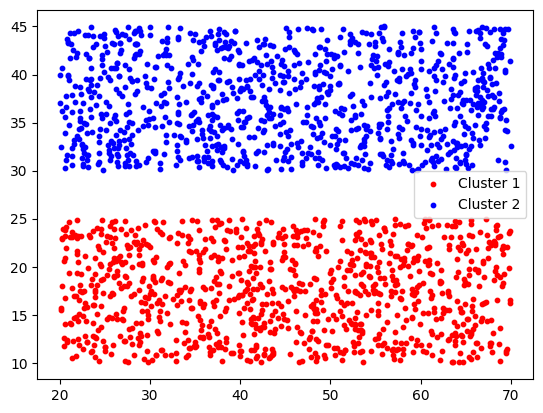

In [14]:
plt.scatter(X[y_predicted == 0, 0], X[y_predicted == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_predicted == 1, 0], X[y_predicted == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_predicted == 2, 0], X[y_predicted == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

#plt.scatter(km.cluster_centers[:, 0] km.cluster_centers_[:,1], s = 400, marker="*" ,c = 'black', label = 'Centroids')
plt.legend()

In [115]:
df.cluster

0      1
1      1
2      1
3      1
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: cluster, Length: 150, dtype: int32

In [30]:
x_5=df['Species'].to_list()
arr1=df['cluster'].to_list()
print(len(x_5))
print(len(arr1))

150
150


In [31]:

labels=df.cluster
# Calculate the percentage of samples in each cluster
cluster_counts = [0,0,0]
for label in labels:
    cluster_counts[label] += 1

percentages = [count / len(labels) * 100 for count in cluster_counts]

# Print the percentage of samples in each cluster
for i, percentage in enumerate(percentages):
    print(f"Cluster {i+1}: {percentage:.2f}%")


Cluster 1: 35.33%
Cluster 2: 64.67%
Cluster 3: 0.00%


In [118]:
sum=0
for i in range(0,150):
    if(x_5[i]==arr1[i]):
        sum=sum+1
sum

65